In [106]:
from dataclasses import dataclass
import pandas as pd
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [113]:
data.head(1)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [107]:
dummy_data = pd.get_dummies(data[['job','marital','education','default','housing','loan','contact','month', 'day_of_week', 'poutcome', 'y']])

In [119]:
new_data = data.drop(['job','marital','education','default','housing','loan','contact','month', 'day_of_week', 'poutcome', 'y'],axis=1)

In [120]:
data = pd.concat([new_data, dummy_data], axis=1)

In [ ]:
data.head()

In [122]:
data.age_cut = pd.cut(data.age, bins=9, labels=[20,30,40,50,60,70,80,90,100])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
data.age_cut.value_counts()

In [128]:
target = (data.y_yes)
features = data.drop(['y_yes', 'y_no', 'age', 'pdays'],axis=1)


In [ ]:
features.head()

In [130]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=.20,train_size=.80,random_state=1000)

In [131]:
oversample = RandomOverSampler(sampling_strategy='minority')

X_train, y_train = oversample.fit_resample(X_train, y_train)

In [132]:
from pandas.core.common import random_state
classifier_RF = RandomForestClassifier(n_estimators=200,max_depth=150,random_state=20000, min_weight_fraction_leaf=.0003)

classifier_RF.fit(X_train,y_train)

y_predicted_RF = classifier_RF.predict(X_test)
#test accuracy
metrics.accuracy_score(y_test, y_predicted_RF)


0.8457149793639233

In [133]:
print(metrics.classification_report(y_test,y_predicted_RF))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7320
           1       0.38      0.63      0.48       918

    accuracy                           0.85      8238
   macro avg       0.67      0.75      0.69      8238
weighted avg       0.89      0.85      0.86      8238



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


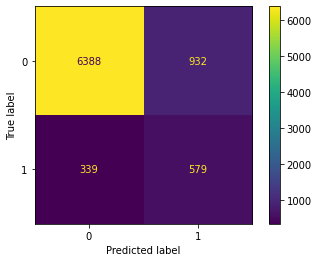

In [134]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
confusion = plot_confusion_matrix(classifier_RF,X_test,y_test)

In [135]:
feature_df = pd.DataFrame(

    {'features': features.columns, 'importance': classifier_RF.feature_importances_})

feature_df.sort_values('importance', ascending=False).head(6)

,features,importance
5,euribor3m,0.179346
6,nr.employed,0.146633
2,emp.var.rate,0.099865
4,cons.conf.idx,0.062027
3,cons.price.idx,0.047307
0,campaign,0.041336


In [140]:
important_data = data.filter(['euribor3n','nr.employed','emp.var.rate','cons.conf.idx','cons.price.idx','campaign','y_yes'])

In [141]:
important_data.head(5)

,nr.employed,emp.var.rate,cons.conf.idx,cons.price.idx,campaign,y_yes
0,5191.0,1.1,-36.4,93.994,1,0
1,5191.0,1.1,-36.4,93.994,1,0
2,5191.0,1.1,-36.4,93.994,1,0
3,5191.0,1.1,-36.4,93.994,1,0
4,5191.0,1.1,-36.4,93.994,1,0


In [142]:
import seaborn as sns

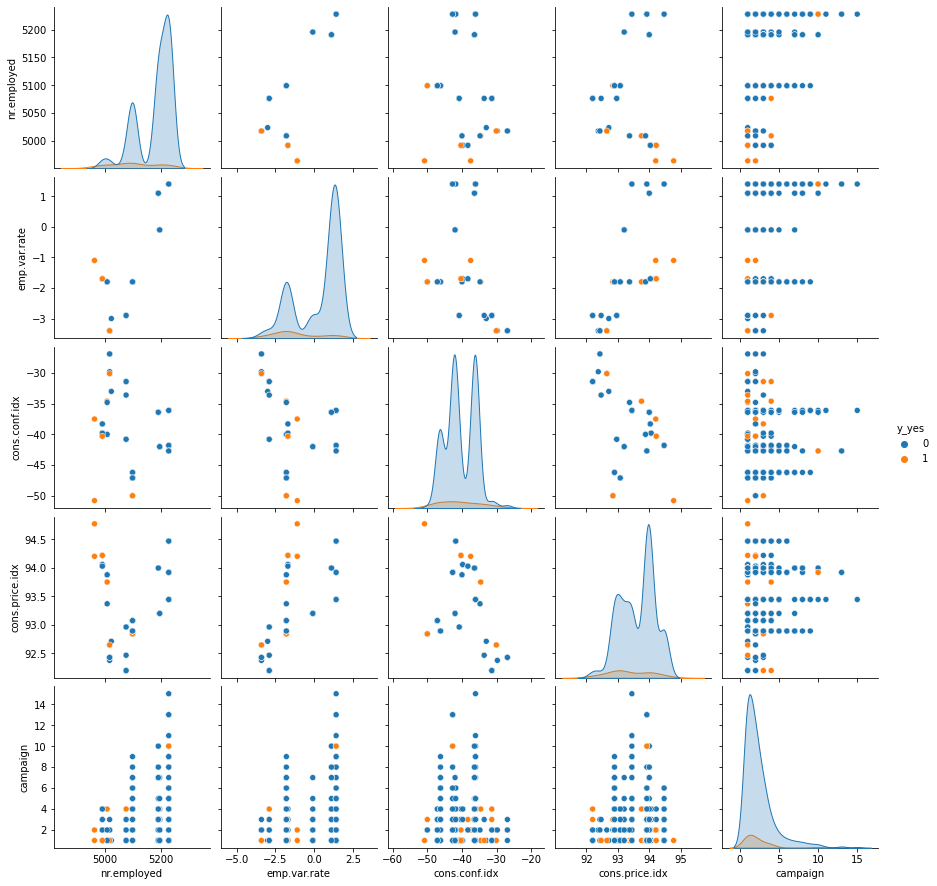

In [143]:
sns.pairplot(important_data.sample(500),hue = 'y_yes')

In [145]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [ ]:
alt.Chart(data).mark_bar().encode(x='y_yes',y='nr.employed')